In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2,
n_clusters_per_class=2, random_state=42, n_redundant=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


num_neurons = 10
kmeans = KMeans(n_clusters=num_neurons, random_state=42, n_init=10)
kmeans.fit(X_train)
centers = kmeans.cluster_centers_
print("Center:", centers)
std_dev = np.mean(cdist(centers, centers, 'euclidean')) / np.sqrt(2*num_neurons)
print("Standard Deviation:", std_dev)

def rbf_activation(X, centers, std_dev):
    return np.exp(-cdist(X, centers, 'sqeuclidean') / (2 * std_dev**2))

rbf_train = rbf_activation(X_train, centers, std_dev)
rbf_test = rbf_activation(X_test, centers, std_dev)
rbf_train = np.hstack([rbf_train, np.ones((rbf_train.shape[0], 1))])
rbf_test = np.hstack([rbf_test, np.ones((rbf_test.shape[0], 1))])

clf = LogisticRegression()
clf.fit(rbf_train, y_train)
y_pred = clf.predict(rbf_test)
accuracy = accuracy_score(y_pred, y_test)
print("Model Accuracy: ", accuracy*100)

X and y

[[-0.99910178 -0.66386   ]
 [ 1.24668618  1.15359685]
 [ 0.96277683  0.85939747]
 [-2.95744095  2.03364529]
 [ 1.14116527  1.05944863]]

[1 1 1 1 1]
Center: [[ 1.87174676 -1.08046587]
 [-0.70845586  1.42857796]
 [-0.91075494 -0.9122673 ]
 [ 0.96790475  1.01878595]
 [ 2.04432599  2.14258911]
 [-2.03689901  2.70401025]
 [ 0.63484364 -1.09831965]
 [-1.45932338 -2.41924946]
 [-0.36108421  0.10445077]
 [-2.24145941  0.72444885]]
Standard Deviation: 0.5925835737379133
Model Accuracy:  84.5


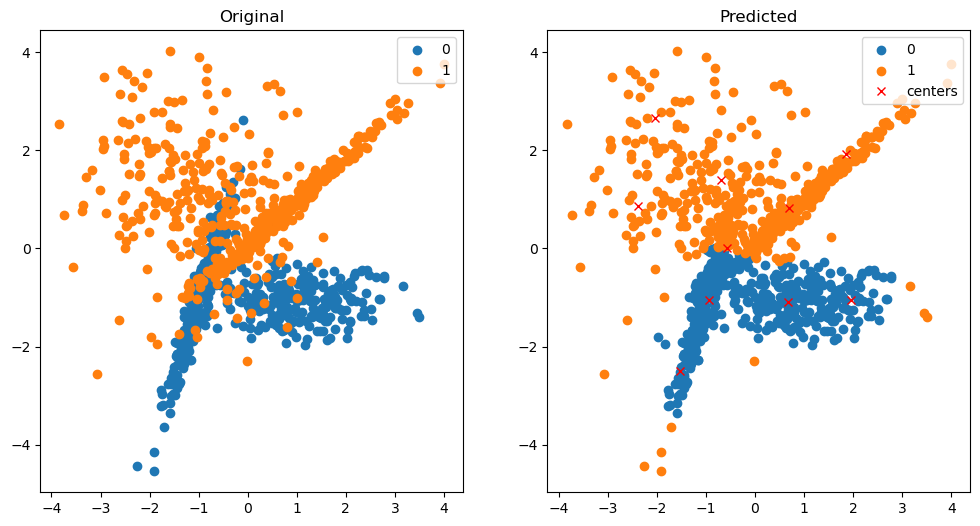

In [6]:

# Visualization
def plot_result(X, y, centers=None):
    plt.scatter(X[y==0, 0], X[y==0, 1], label="0")
    plt.scatter(X[y==1, 0], X[y==1, 1], label="1")
    if centers is not None:
        plt.plot(centers[:,0], centers[:,1],'rx', label="centers")
    plt.legend(loc="upper right")
        
rbf_x = rbf_activation(X, centers=centers, std_dev=std_dev)
activated_x = np.hstack([rbf_x, np.ones((rbf_x.shape[0], 1))])
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Original")
plot_result(X, y)
plt.subplot(122)
plt.title("Predicted")
plot_result(X, clf.predict(activated_x), centers=centers)